In [ ]:
!pip install tensorflow

# **Importing tensorflow liberaries**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as snb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, cv2, random, keras
from PIL import Image
import numpy as np

# ***Loading an Image from my Google drive***
# *Train set and Test set dat separatly*

In [3]:
train_data_path = ('/content/drive/MyDrive/Gender/train/');
test_data_path = ('/content/drive/MyDrive/Gender/test/');

# **Specify number of samples**
# *Declear variables*

In [34]:
SIZE = 500
dataset = []
label = []
dataset_test = []
label_test = []


# **Store Male training image to the dataset variable**
# *Add label of these images*

In [35]:
Male_images = os.listdir(train_data_path + 'men/')
for i, image_name in enumerate(Male_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(train_data_path + 'men/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

# **Store Male Testset image to the test dataset variable**
# *Add label of these images*

In [36]:
Male_images_test = os.listdir(test_data_path + 'men/')
for i, image_name in enumerate(Male_images_test):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(test_data_path + 'men/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset_test.append(np.array(image))
        label_test.append(1)

# **Store Female training image to the dataset variable**
# Add label of these images

In [37]:
Female_images = os.listdir(train_data_path + 'women/')
for i, image_name in enumerate(Female_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(train_data_path + 'women/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

# **Store Female testset image to the testset dataset variable**
# *Add label of these images*

In [38]:
Female_images = os.listdir(test_data_path + 'women/')
for i, image_name in enumerate(Female_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(test_data_path + 'women/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset_test.append(np.array(image))
        label_test.append(0)

In [39]:
dataset = np.array(dataset)
label = np.array(label)
dataset_test = np.array(dataset_test)
label_test = np.array(label_test)


In [40]:
X_train =  dataset
y_train = label
X_test =  dataset_test
y_test = label_test

In [41]:
print(dataset.shape)
print(label.shape)
print(dataset_test.shape)
print(label_test.shape)

(220, 500, 500, 3)
(220,)
(80, 500, 500, 3)
(80,)


In [42]:
print(label_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


# ***Check the label of an image randomly***

Text Label for this Image in Training dataset is: Female
Numebr Label for this Image in Training dataset is: 0


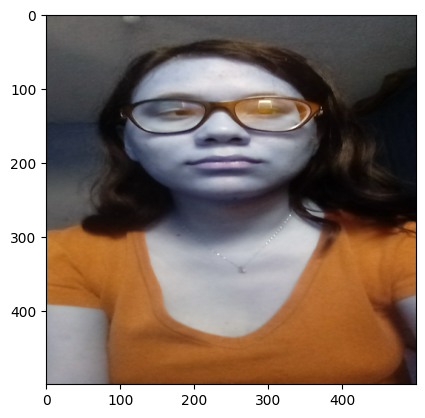

In [47]:
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (SIZE, SIZE, 3)))
label_number = label[image_number]
image_label = ""
if label_number == 1:
  image_label= 'Male'
else:
  image_label= 'Female'
print("Text Label for this Image in Training dataset is:", image_label)
print("Numebr Label for this Image in Training dataset is:", label[image_number])

Text Label for this Image in Test dataset is: Male
Numebr Label for this Image in Test dataset is: 1


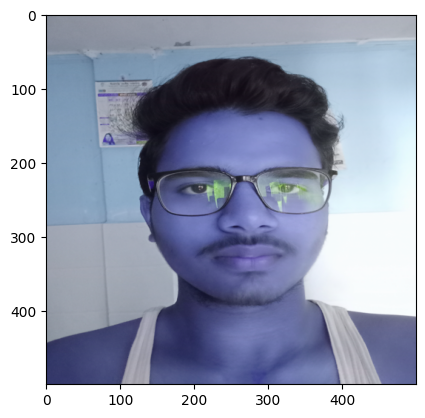

In [46]:
import random
image_number = random.randint(0, len(dataset_test)-1)
plt.imshow(np.reshape(dataset_test[image_number], (SIZE, SIZE, 3)))
label_number = label[image_number]
image_label = ""
if label_number == 1:
  image_label= 'Male'
else:
  image_label= 'Female'
print("Text Label for this Image in Test dataset is:", image_label)
print("Numebr Label for this Image in Test dataset is:", label[image_number])

# ***Pre-processing of an Image***

# *Normalization or Scaling an image using max value of an image (255)*

In [48]:
X_train = X_train/255
X_test = X_test/255
print(X_test.shape)
print(X_train.shape)

(80, 500, 500, 3)
(220, 500, 500, 3)


# ***Model Building using tensorflow keras***

# **CNN**

In [71]:
cnn = models.Sequential([
    layers.Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', input_shape = (SIZE, SIZE, 3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),



    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'sigmoid')
])

# ***Compile or Run the model***

In [72]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [73]:
history = cnn.fit(X_train, y_train, batch_size =32,
                    verbose =1,
                    epochs = 25,
                    validation_data = (X_test, y_test),
                    shuffle = False)

Epoch 1/25
7/7 [==============================] - 3s 263ms/step - loss: 6.4329 - accuracy: 0.3545 - val_loss: 2.2937 - val_accuracy: 0.5000
Epoch 2/25
7/7 [==============================] - 1s 122ms/step - loss: 2.4329 - accuracy: 0.6455 - val_loss: 2.1887 - val_accuracy: 0.5000
Epoch 3/25
7/7 [==============================] - 1s 142ms/step - loss: 1.6894 - accuracy: 0.5000 - val_loss: 1.4769 - val_accuracy: 0.5000
Epoch 4/25
7/7 [==============================] - 1s 119ms/step - loss: 1.4405 - accuracy: 0.5000 - val_loss: 1.1253 - val_accuracy: 0.5000
Epoch 5/25
7/7 [==============================] - 1s 122ms/step - loss: 1.1436 - accuracy: 0.5000 - val_loss: 0.7279 - val_accuracy: 0.5125
Epoch 6/25
7/7 [==============================] - 1s 142ms/step - loss: 0.8878 - accuracy: 0.3091 - val_loss: 0.7364 - val_accuracy: 0.5000
Epoch 7/25
7/7 [==============================] - 1s 158ms/step - loss: 0.7217 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5500
Epoch 8/25
7/7 [====

# ***Evaluate the model using testset data***

In [74]:
cnn.evaluate(X_test, y_test)

3/3 [==============================] - 0s 43ms/step - loss: 0.6616 - accuracy: 0.6750


[0.6615926623344421, 0.675000011920929]

# ***Set predicted value to the variable and display the first five***

In [75]:
y_predict = cnn.predict(X_test)
y_predict[:5]

3/3 [==============================] - 0s 42ms/step


array([[1.00000000e+00, 1.00000000e+00, 7.36315250e-01, 2.86626047e-03,
        6.01759136e-01, 2.70105579e-06, 3.81647478e-05, 6.70866907e-01,
        5.18683136e-01, 3.10956873e-03, 1.25599399e-01, 4.78335731e-02,
        9.28202212e-01, 3.70119305e-05, 1.88251067e-06, 9.84373927e-01,
        1.48833923e-08, 1.15594678e-02, 3.54817569e-01, 5.66086583e-02,
        1.77784459e-04, 9.51445520e-01, 1.57562259e-04, 6.64243657e-07,
        7.04046943e-06, 1.86516042e-03, 1.20175041e-01, 8.39440509e-06,
        1.98159181e-02, 3.66714172e-04, 8.67489874e-01, 7.05744699e-02,
        5.64289978e-04, 9.93830800e-01, 1.94268487e-03, 5.15454797e-11,
        2.33928309e-04, 9.82162297e-01, 2.32772509e-05, 6.65606186e-03,
        9.80423351e-07, 9.13871169e-01, 4.31519777e-01, 5.49551054e-08,
        2.17753609e-06, 4.81503903e-09, 6.44612010e-04, 8.01709830e-05,
        8.57108891e-01, 7.56011787e-07, 1.36215604e-07, 7.28058296e-07,
        4.13203437e-04, 2.04043565e-04, 8.78385763e-05, 9.656531

# ***Convert the predicted  value to class label using argmax or using maximum value***

In [76]:
np.argmax(y_predict[2])
y_class = [np.argmax(element) for element in y_predict]
# len(y_predict)
y_class[:5]

[0, 1, 1, 1, 1]

# **Classification report using precision, recall, f1-score, and accuracy**

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = cnn.predict(X_test)
y_predict_class = [np.argmax(element) for element in y_predict]
print("Classification Report: \n", classification_report(y_test, y_predict_class))

3/3 [==============================] - 0s 43ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        40
           1       0.74      0.62      0.68        40

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



# ***Plot accuracy, and loss of training and validation***

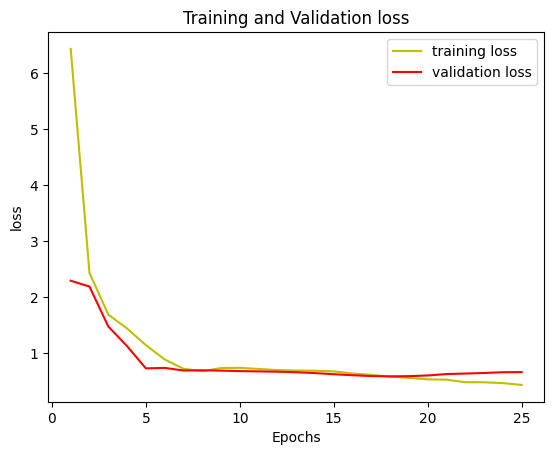

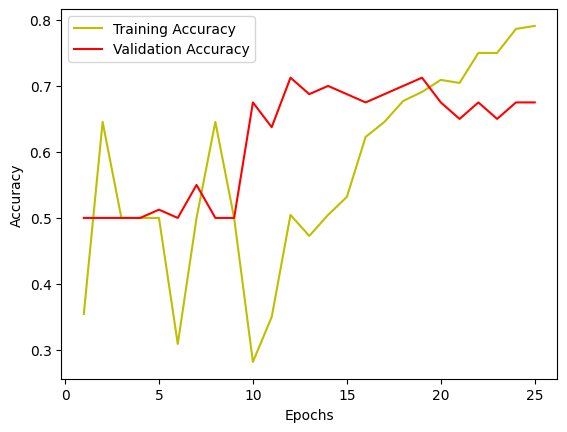

In [78]:
# plot the training and validation accuracy and loos at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label = 'training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ***Compare actual and predicted value by displaying an image with its actual and predicted class label***

1/1 [==============================] - 0s 22ms/step
the prediction for this image is:  1
the prediction for this image is:  Male
the Actual for this image is:  1
the Actual for this image is:  Male


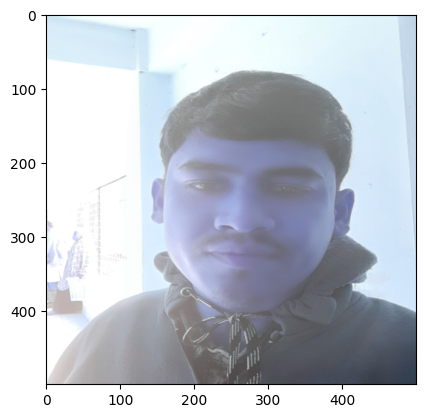

In [83]:
# Test the model on single image
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_image = np.expand_dims(img, axis = 0)
image_label_in_text = ''
Actual_image_label_in_text = ''
if y_test[n] == 1:
  Actual_image_label_in_text = 'Male'
else:
  Actual_image_label_in_text = 'Female'
if np.argmax(cnn.predict(input_image)) >= 0.5:
  image_label_in_text = 'Male'
else:
  image_label_in_text = 'Female'
# np.argmax(cnn.predict(input_image))
# cnn.predict(input_image)
print("the prediction for this image is: ", np.argmax(cnn.predict(input_image)))
print("the prediction for this image is: ", image_label_in_text)
print("the Actual for this image is: ", y_test[n])
print("the Actual for this image is: ", Actual_image_label_in_text)

# ***Display Accuracy of a model***

In [84]:
# Evalute the model with all test data
_, accuracy =  cnn.evaluate(X_test, y_test)
print('Accuracy of the model is', (accuracy * 100.0), '%')

3/3 [==============================] - 0s 42ms/step - loss: 0.6616 - accuracy: 0.6750
Accuracy of the model is 67.5000011920929 %


# ***Confusion matrix***

3/3 [==============================] - 0s 43ms/step


<Axes: >

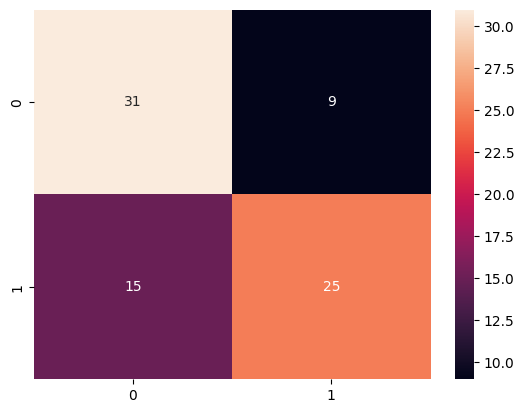

In [87]:
# confusion matrix
y_prediction =[np.argmax(element) for element in cnn.predict(X_test)]
confusion_Matrix = confusion_matrix(y_test, y_prediction)
snb.heatmap(confusion_Matrix, annot = True)

# ***Draw ROC of a model***

3/3 [==============================] - 0s 43ms/step


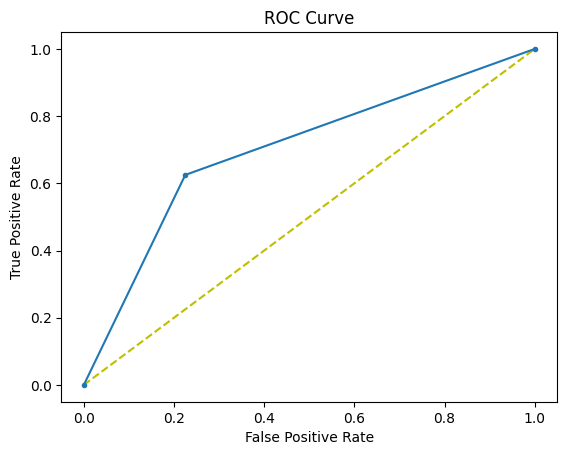

In [86]:
# ROC
from sklearn.metrics import roc_curve

y_predictions = (cnn.predict(X_test).ravel())
y_predictions =[np.argmax(element) for element in cnn.predict(X_test)]
len(y_predictions)
false_prediction, true_prediction, thresholds = roc_curve(y_test, y_predictions)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(false_prediction, true_prediction, marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [88]:
# threshold
import pandas as pd
i = np.arange(len(true_prediction))
roc = pd.DataFrame({'tf' : pd.Series(true_prediction - (1 - true_prediction), index = i), 'threholds' : pd.Series(thresholds, index= i)})
ideal_roc_threshold = roc.iloc[(roc.tf-0).abs().argsort()[:1]] #Locate the point where the value is close to 0
print("Ideal threshold is : ", ideal_roc_threshold['threholds'])

Ideal threshold is :  1    1
Name: threholds, dtype: int64


# ***Calculate Area un the Curve of the model***

In [89]:
# Area Under the Curve (AUC)

from sklearn.metrics import auc
area_under_the_curve_value = auc(false_prediction, true_prediction)
print('Area Under the Curve, AUC = ', area_under_the_curve_value)

Area Under the Curve, AUC =  0.7000000000000001
